In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import time #for pausing in order to not have too many API calls in a short amount of time
import datetime

#current date time
now = datetime.datetime.now()

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries=[]


# Create a set of random lat and lng combinations. 
# By using uniform distribution we will mitigate against getting cities located in a cluster together.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city and the country it is in, for each lat, lng combination
for lat_lng in lat_lngs:
    city_info = citipy.nearest_city(lat_lng[0], lat_lng[1])
    cities.append(city_info.city_name)
    countries.append(city_info.country_code)
    # If the city is unique, then add it to a our cities list
    #if city_country not in city_countries:
    #    cities.append(city)
    #    countries.append(country)

# Make weather_location dataframe
weather_location_df = pd.DataFrame()
weather_location_df["city"] = cities
weather_location_df["country"]=countries

# Delete Duplicates
weather_location_df = weather_location_df.drop_duplicates(["city", "country"])

#print number of cities
print(len(weather_location_df["city"]))

595


## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ api_key +"&q="

# Build partial query URL
print(query_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=940ce6dd831aa99d86d855a228def2a0&q=


In [4]:
# set up lists to hold reponse info
lat = []
temp = []
humidity = []
cloudiness = []
windSpeed = []

#Set up counter for cities.
cityCount = 0

# Loop through the list of cities and perform a request for data on each.
# If error reduce city count and enter None for data.
for index, row in weather_location_df.iterrows():
    cityCount+=1
    print(f"Now retrieving city #{cityCount}: {row['city'].capitalize()}, {row['country'].upper()}")
    time.sleep(1)
    try:
        response = requests.get(query_url + row['city']+","+row['country']).json()
#        print(query_url + row['city']+","+row['country'])
#        print(response)
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
    except:
        cityCount-=1
        lat.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        windSpeed.append(None)
        print(f"Error in getting data for {row['city'].capitalize()}, {row['country'].upper()}; skipping.")

Now retrieving city #1: Tuktoyaktuk, CA
Now retrieving city #2: Taolanaro, MG
Error in getting data for Taolanaro, MG; skipping.
Now retrieving city #2: Saint-philippe, RE
Now retrieving city #3: Ponta do sol, CV
Now retrieving city #4: Port hardy, CA
Now retrieving city #5: Avarua, CK
Now retrieving city #6: Punta arenas, CL
Now retrieving city #7: Tongren, CN
Now retrieving city #8: Kaitangata, NZ
Now retrieving city #9: Axim, GH
Now retrieving city #10: Sataua, WS
Error in getting data for Sataua, WS; skipping.
Now retrieving city #10: Kavaratti, IN
Now retrieving city #11: Bambous virieux, MU
Now retrieving city #12: Vanderhoof, CA
Now retrieving city #13: Saint anthony, CA
Error in getting data for Saint anthony, CA; skipping.
Now retrieving city #13: Busselton, AU
Now retrieving city #14: Ostrovnoy, RU
Now retrieving city #15: Louisbourg, CA
Error in getting data for Louisbourg, CA; skipping.
Now retrieving city #15: Illoqqortoormiut, GL
Error in getting data for Illoqqortoormiut

Now retrieving city #141: Salalah, OM
Now retrieving city #142: Vestmannaeyjar, IS
Now retrieving city #143: Chagda, RU
Error in getting data for Chagda, RU; skipping.
Now retrieving city #143: Burica, PA
Error in getting data for Burica, PA; skipping.
Now retrieving city #143: Najran, SA
Now retrieving city #144: Khormuj, IR
Error in getting data for Khormuj, IR; skipping.
Now retrieving city #144: Leshukonskoye, RU
Now retrieving city #145: Manga, BR
Now retrieving city #146: Caborca, MX
Now retrieving city #147: Grand river south east, MU
Error in getting data for Grand river south east, MU; skipping.
Now retrieving city #147: Hilo, US
Now retrieving city #148: Ambatofinandrahana, MG
Now retrieving city #149: Moba, CD
Now retrieving city #150: Mahebourg, MU
Now retrieving city #151: Ribeira grande, PT
Now retrieving city #152: Ambilobe, MG
Now retrieving city #153: Waverly, US
Now retrieving city #154: Mys shmidta, RU
Error in getting data for Mys shmidta, RU; skipping.
Now retrievi

Now retrieving city #297: Flinders, AU
Now retrieving city #298: Marcona, PE
Error in getting data for Marcona, PE; skipping.
Now retrieving city #298: Juneau, US
Now retrieving city #299: Lorain, US
Now retrieving city #300: Turayf, SA
Now retrieving city #301: Zyryanovsk, KZ
Now retrieving city #302: Baruun-urt, MN
Now retrieving city #303: Watertown, US
Now retrieving city #304: Codrington, AG
Error in getting data for Codrington, AG; skipping.
Now retrieving city #304: Ratnagiri, IN
Now retrieving city #305: Urdzhar, KZ
Error in getting data for Urdzhar, KZ; skipping.
Now retrieving city #305: Limbang, MY
Now retrieving city #306: Creemore, CA
Now retrieving city #307: Umm lajj, SA
Now retrieving city #308: Sioux lookout, CA
Now retrieving city #309: Baykit, RU
Now retrieving city #310: Namibe, AO
Now retrieving city #311: Belebey, RU
Now retrieving city #312: Murygino, RU
Now retrieving city #313: Solsvik, NO
Error in getting data for Solsvik, NO; skipping.
Now retrieving city #31

Error in getting data for Puerto gaitan, CO; skipping.
Now retrieving city #460: Honningsvag, NO
Now retrieving city #461: Halifax, CA
Now retrieving city #462: Carutapera, BR
Now retrieving city #463: Nova olimpia, BR
Now retrieving city #464: Batagay-alyta, RU
Now retrieving city #465: Morehead, PG
Now retrieving city #466: Bolshoye sorokino, RU
Error in getting data for Bolshoye sorokino, RU; skipping.
Now retrieving city #466: Kodinsk, RU
Now retrieving city #467: Yar-sale, RU
Now retrieving city #468: Mgachi, RU
Now retrieving city #469: Nemuro, JP
Now retrieving city #470: Tarudant, MA
Error in getting data for Tarudant, MA; skipping.
Now retrieving city #470: Hofn, IS
Now retrieving city #471: Mancio lima, BR
Error in getting data for Mancio lima, BR; skipping.
Now retrieving city #471: Faya, TD
Error in getting data for Faya, TD; skipping.
Now retrieving city #471: Taywarah, AF
Now retrieving city #472: Olinda, BR
Now retrieving city #473: Khonuu, RU
Error in getting data for K

In [5]:
# Add response info to my data frame
weather_location_df["latitude"] = lat
weather_location_df["temperature"] = temp
weather_location_df["humidity"] = humidity
weather_location_df["cloudiness"] = cloudiness
weather_location_df["windSpeed"] = windSpeed
        
# print number of cities for which weather information was found
found_weather_location_df = weather_location_df.dropna()
print(len(found_weather_location_df.index))


508


In [6]:
# print to csv file
weather_location_df.to_csv("output_data/cities.csv")

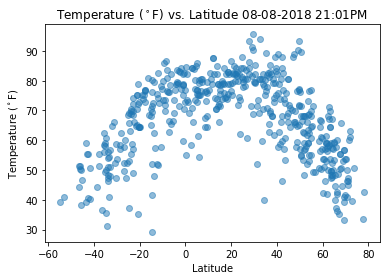

In [7]:
# Make Temperature (F) vs. Latitude Scatterplot
plt.scatter(found_weather_location_df["latitude"],found_weather_location_df["temperature"], alpha = 0.5)

plt.title("Temperature ($^\circ$F) vs. Latitude " + now.strftime("%m-%d-%Y %H:%M%p"))
plt.xlabel("Latitude")
plt.ylabel("Temperature ($^\circ$F)")
plt.savefig("Temperature.png")
plt.show()

Observation:  
This scatterplot suggests that temperatures are maximized near the latitude of 20 and decrease as the location moves towards 80 and -80. This makes sense since direct exposure to the sun is greatest near the equator and less as you move toward the polls. Additionally since the upper hemisphere is tilted toward the sun right now the max temperature is pulled up from zero.

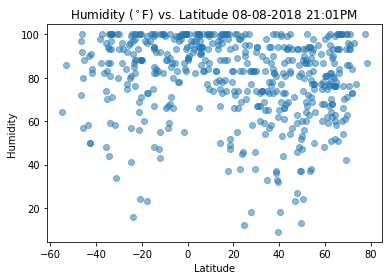

In [8]:
# Humidity (%) vs. Latitude Scatterplot
plt.scatter(weather_location_df["latitude"],weather_location_df["humidity"], alpha = 0.5)

plt.title("Humidity ($^\circ$F) vs. Latitude " + now.strftime("%m-%d-%Y %H:%M%p"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

Observation:
The humidity does not seem to be directly affected by the latitude. Based on this data, there does not appear to be a corrolation between latitude and humidity. 

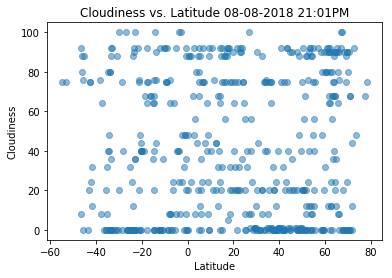

In [9]:
# Cloudiness (%) vs. Latitude Scatterplot
plt.scatter(weather_location_df["latitude"],weather_location_df["cloudiness"], alpha = 0.5)

plt.title("Cloudiness vs. Latitude " + now.strftime("%m-%d-%Y %H:%M%p"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.show()

Observation:
This scatterplot looks fairly uniform indicating no relationship between latitude and cloudiness.

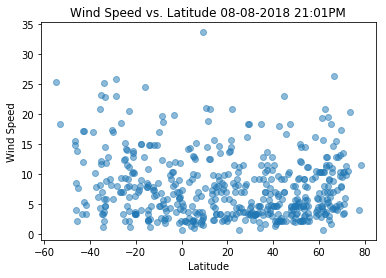

In [10]:
# Wind Speed (mph) vs. Latitude Scatterplot
plt.scatter(weather_location_df["latitude"],weather_location_df["windSpeed"], alpha = 0.5)

plt.title("Wind Speed vs. Latitude " + now.strftime("%m-%d-%Y %H:%M%p"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("WindSpeed.png")
plt.show()

Observation:
There does not appear to be a corrolation between latitude and wind speed. It does appear that wind speed on this particular day seems to have a median value of ~5mph regardless of latitude. 